In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [437]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [438]:
from IPython.display import HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>"
HTML(style)

In [439]:
titanic_data = pd.read_csv('train (1).csv')

In [440]:
titanic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [441]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [442]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [405]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 
                       'Cabin'], axis = 1)

In [406]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [407]:
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [408]:
X.Age.median()

28.0

In [409]:
X = X.fillna({'Age' : X.Age.median()})
titanic_data.Survived

In [443]:
y = titanic_data.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [411]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [412]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

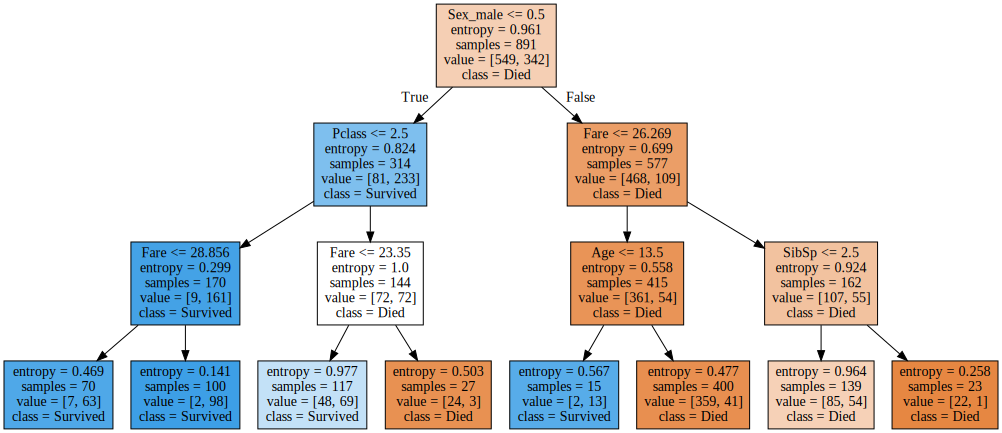

In [413]:
graph = Source(tree.export_graphviz(clf, out_file = None,
                                   feature_names = list(X),
                                   class_names = ['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [414]:
# total = clf.feature_importances_
# total

In [415]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [417]:
X_train.shape

(596, 10)

In [418]:
X_test.shape

(295, 10)

In [419]:
clf.score(X, y)

0.8226711560044894

In [420]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [421]:
clf.score(X_train, y_train) #известные данные

0.8238255033557047

In [422]:
clf.score(X_test, y_test)

0.8203389830508474

In [423]:
max_depth_values = range(1, 100)

In [424]:
scores_data = pd.DataFrame()

In [425]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                    'train_score' : [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)   

In [426]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'],
                         value_vars = ['train_score', 'test_score', 'cross_val_score'],
                         var_name = 'set_type',
                         value_name = 'score')

In [427]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [428]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [429]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.795308


<AxesSubplot:xlabel='max_depth', ylabel='score'>

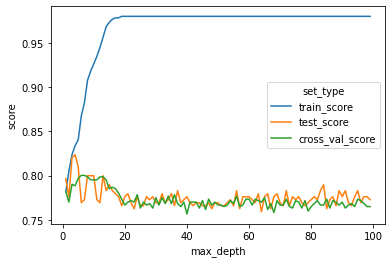

In [430]:
sns.lineplot(data = scores_data_long, x = 'max_depth', y = 'score',
            hue = 'set_type')

In [431]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=10)

In [435]:
cross_val_score(best_clf, X_test, y_test, cv = 5).mean()

0.7864406779661017